# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

In [138]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

In [139]:
df = pd.read_excel('Online Retail.xlsx')

In [34]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [145]:
df.shape

(536641, 8)

In [146]:
df = df.dropna()

In [193]:
df= df[df['Quantity']>=0]

In [194]:
df.shape

(392732, 9)

In [195]:
df['InvoiceDate'].unique()

<DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 17286, dtype: datetime64[ns]

In [196]:
df['CustomerID']= df['CustomerID'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_3184\139354482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']= df['CustomerID'].astype(int)


In [197]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_mois
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12


## Mois avec le plus de transactions

In [198]:
df.dtypes

InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                   int32
Country                     object
Transaction_mois            object
dtype: object

In [199]:
df['Transaction_mois'] = df['InvoiceDate'].dt.strftime('%Y-%m')

C:\Users\user\AppData\Local\Temp\ipykernel_3184\1570541702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction_mois'] = df['InvoiceDate'].dt.strftime('%Y-%m')


In [200]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_mois
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12


In [201]:
nombre_de_transactions_par_mois = df.groupby('Transaction_mois')['InvoiceNo'].size()

In [202]:
print(f"Sur 1 an de vente, les trois mois comptabilisant le plus de transactions sont : \n {nombre_de_transactions_par_mois.nlargest(3)}")

Sur 1 an de vente, les trois mois comptabilisant le plus de transactions sont : 
 Transaction_mois
2011-11    63182
2011-10    48796
2011-09    39671
Name: InvoiceNo, dtype: int64


## Evolution du nombre de transactions en en 12 mois

In [203]:
import seaborn as sns

In [204]:
nombre_de_transactions_par_mois = nombre_de_transactions_par_mois.reset_index(name= 'Transactions')

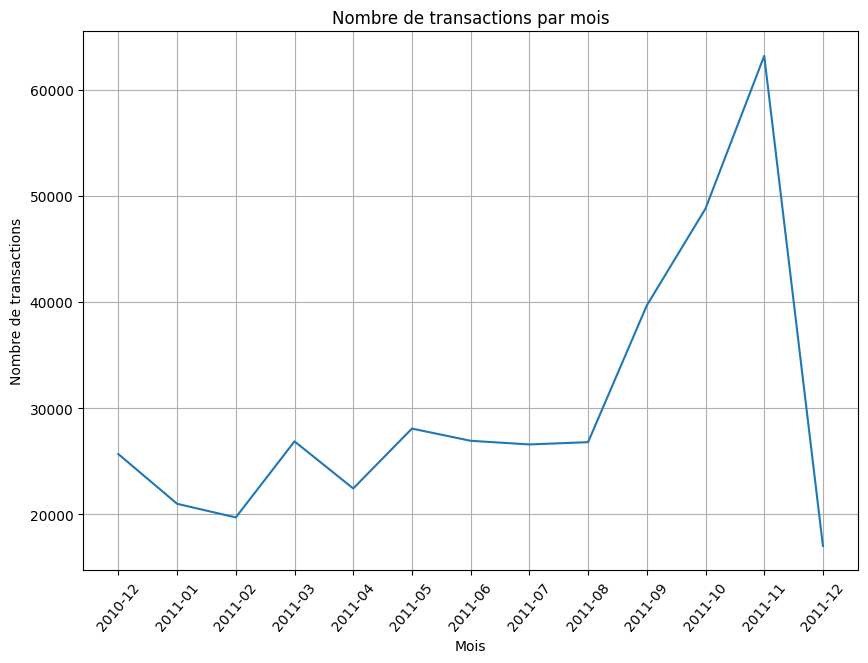

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(nombre_de_transactions_par_mois['Transaction_mois'], nombre_de_transactions_par_mois['Transactions'], linestyle='-')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions par mois')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()


## Produit le plus rentable 

In [206]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_mois
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12


In [207]:
produit_le_plus_vendu = df.groupby('Description')['Quantity'].sum().reset_index(name= "Quantite_vendue")

In [208]:
produit_le_plus_vendu = produit_le_plus_vendu.nlargest(15, 'Quantite_vendue')

In [209]:
print(f"Le top 3 des produits les plus vendus sont : \n {produit_le_plus_vendu.nlargest(3, 'Quantite_vendue')}")

Le top 3 des produits les plus vendus sont : 
                             Description  Quantite_vendue
2319        PAPER CRAFT , LITTLE BIRDIE            80995
1992     MEDIUM CERAMIC TOP STORAGE JAR            77916
3786  WORLD WAR 2 GLIDERS ASSTD DESIGNS            54319


Text(0.5, 1.0, 'Representation des N produits les plus vendus')

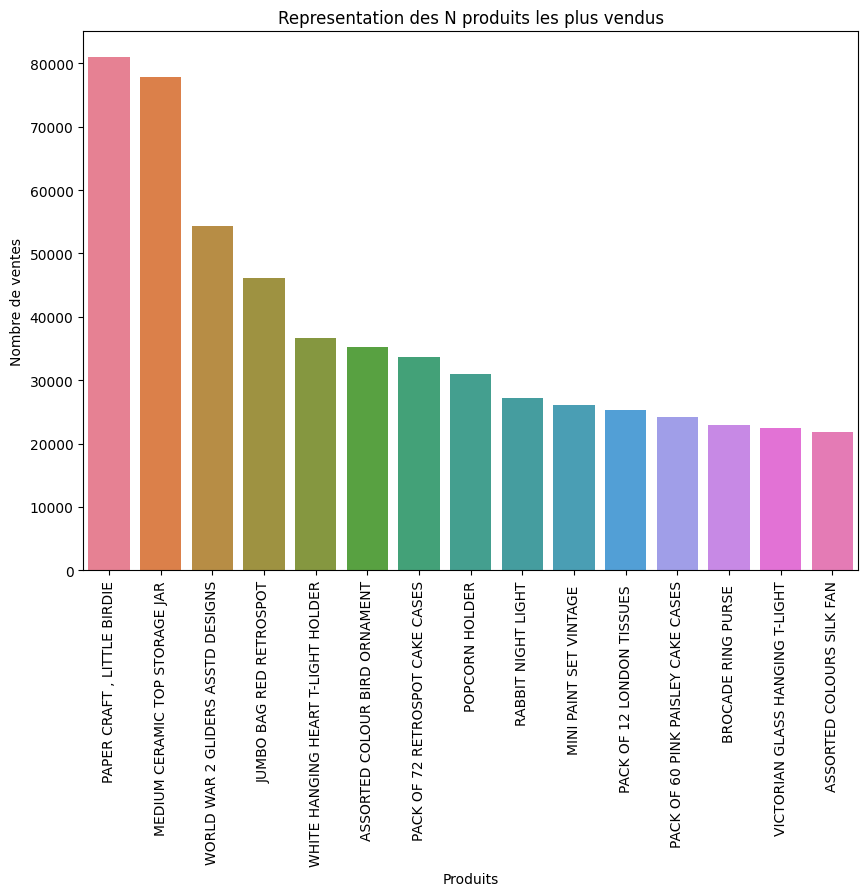

In [210]:
plt.figure(figsize=(10,7))
sns.barplot(x= produit_le_plus_vendu['Description'], y=produit_le_plus_vendu['Quantite_vendue'], hue = produit_le_plus_vendu['Description'], legend=False)
plt.xlabel('Produits')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 90)
plt.title('Representation des N produits les plus vendus')

## Client le plus prolifique 

In [212]:
#Un client prolifique est un client qui a effectué le plus de transactions 

df['Total_amount']= df['Quantity'] * df['UnitPrice']

C:\Users\user\AppData\Local\Temp\ipykernel_3184\516575171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_amount']= df['Quantity'] * df['UnitPrice']


In [213]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_mois,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,16.60


In [216]:
client_le_plus_fidele = df.groupby(['CustomerID', 'Country'])['InvoiceNo'].size().reset_index(name= 'Nombre_de_transactions').nlargest(10, 'Nombre_de_transactions')

In [220]:
print(f"Le top 10 des clients les plus fidèles sont : \n {client_le_plus_fidele}")

Le top 10 des clients les plus fidèles sont : 
       CustomerID         Country  Nombre_de_transactions
4019       17841  United Kingdom                    7676
1888       14911            EIRE                    5672
1298       14096  United Kingdom                    5111
334        12748  United Kingdom                    4413
1670       14606  United Kingdom                    2677
2185       15311  United Kingdom                    2366
1698       14646     Netherlands                    2080
570        13089  United Kingdom                    1814
699        13263  United Kingdom                    1667
1443       14298  United Kingdom                    1637


In [221]:
client_generant_le_plus_de_revenus = df.groupby('CustomerID')['Total_amount'].sum().reset_index(name= 'Vente_total_par_client')

In [223]:
client_generant_le_plus_de_revenus.nlargest(5, 'Vente_total_par_client')

,CustomerID,Vente_total_par_client
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194390.79
3009,16446,168472.50
1880,14911,143711.17


In [224]:
print(f"Le client 14646 a un total d'achats plus important")

Le client 14646 a un total d'achats plus important


## Repartition des pays liés aux transactions

In [225]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [226]:
repartition_pays = df.groupby('Country')['InvoiceNo'].size().reset_index(name='Nombre_transactions').nlargest(12, 'Nombre_transactions')

Text(0.5, 1.0, 'Nombre de transactions par pays')

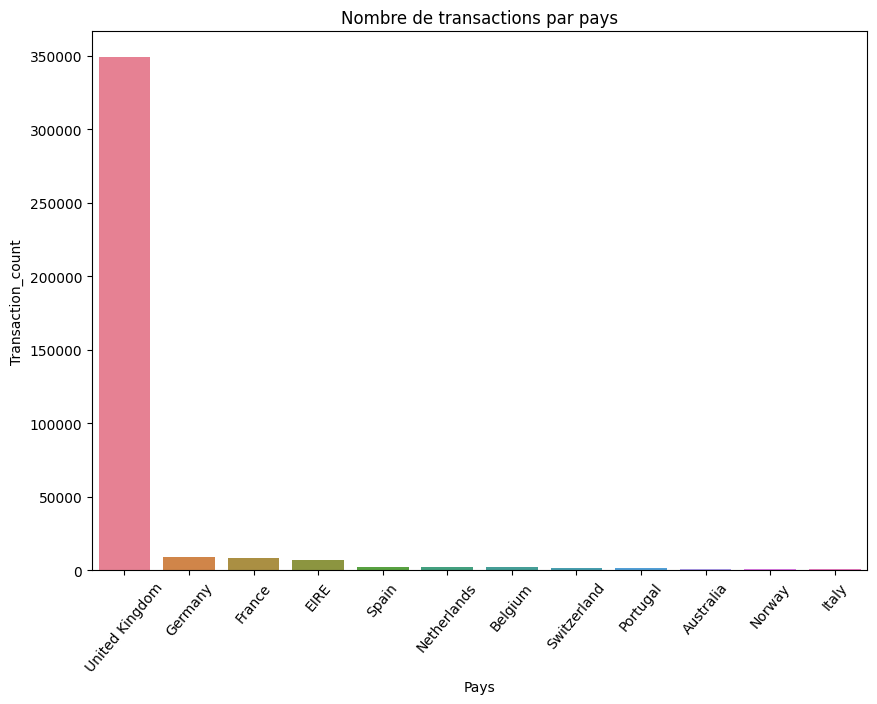

In [229]:
plt.figure(figsize=(10,7))

sns.barplot(x=repartition_pays['Country'], y=repartition_pays['Nombre_transactions'], hue=repartition_pays['Country'], legend=False)
plt.xlabel('Pays')
plt.ylabel('Transaction_count')
plt.xticks(rotation= 50)
plt.title("Nombre de transactions par pays")